In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Setup

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
%pip install -q  roboflow

import torch
import os
from IPython.display import Image ,clear_output

print(f"Setup complete. Ussing torch {torch.__version__} {torch.cuda.get_device_properties(0).name}")

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 18.55 MiB/s, done.
Resolving deltas: 100% (11718/11718), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
Setup complete. Using torch 2.5.1+cu121 Tesla T4


In [ ]:
os.environ["DATASET_DIRECTORY"]="/content/datasets"

Dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="Jse8IIPm1Z2kzGnO1d1a")
project = rf.workspace("honeybee").project("honeybee_varroamite")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/HoneyBee_VarroaMite-1 in yolov5pytorch:: 100%|██████████| 7904/7904 [00:03<00:00, 2575.88it/s]


In [ ]:
import torch

# Safely load the full checkpoint, including optimizer and other states
checkpoint_path = '/content/drive/MyDrive/Bee-Project/yolov5_results/exp/weights/last.pt'
try:
    checkpoint = torch.load(checkpoint_path, weights_only=False)
    print("Checkpoint loaded successfully with full data.")
except Exception as e:
    print(f"Error loading checkpoint: {e}")


Error loading checkpoint: [Errno 2] No such file or directory: '/content/drive/MyDrive/yolov5_results/exp/weights/last.pt'


Training YOLOv5

In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache --project /content/drive/MyDrive/Bee-Project/yolov5_results --save-period 5

Görüntülenen çıkış son 5000 satıra kısaltıldı.
      87/99      1.97G    0.03412   0.008635          0         18        416:  56% 111/198 [00:23<00:21,  3.97it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      87/99      1.97G    0.03413   0.008619          0         23        416:  57% 112/198 [00:23<00:18,  4.68it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      87/99      1.97G    0.03413   0.008623          0         33        416:  57% 113/198 [00:23<00:21,  4.02it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      87/99      1.97G    0.03414  

Continue Training

In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights /content/drive/MyDrive/Bee-Project/yolov5_results/exp/weights/last.pt --cache --save-period 5

Görüntülenen çıkış son 5000 satıra kısaltıldı.
      87/99      1.97G    0.02711   0.007424          0         18        416:  56% 111/198 [00:22<00:14,  5.84it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      87/99      1.97G    0.02713   0.007411          0         23        416:  57% 112/198 [00:22<00:14,  6.13it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      87/99      1.97G    0.02714   0.007417          0         33        416:  57% 113/198 [00:23<00:15,  5.62it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      87/99      1.97G    0.02715  

Results

Prediction

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Bee-Project/yolov5_results/exp2/weights/best.pt --img 416 --conf 0.2 --source {dataset.location}/valid/images

detect: weights=['/content/drive/MyDrive/Bee-Project/yolov5_results/exp2/weights/best.pt'], source=/content/datasets/HoneyBee_VarroaMite-1/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/395 /content/datasets/HoneyBee_VarroaMite-1/valid/images/2017-08-28_09-30-00-1_500_dirty_glass-mp4-bee_id_6710-1365-1_png_jpg.rf.d49cfeba86f8bc0e9e4bc0cfc1be3cef.jpg: 416x416 1 varroa_mite, 8.

In [2]:
import glob
from IPython.display import Image, display

i=0
for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
  i+=1
  if i<8 :
    display(Image(filename=imageName))
    print("\n")

Graphs

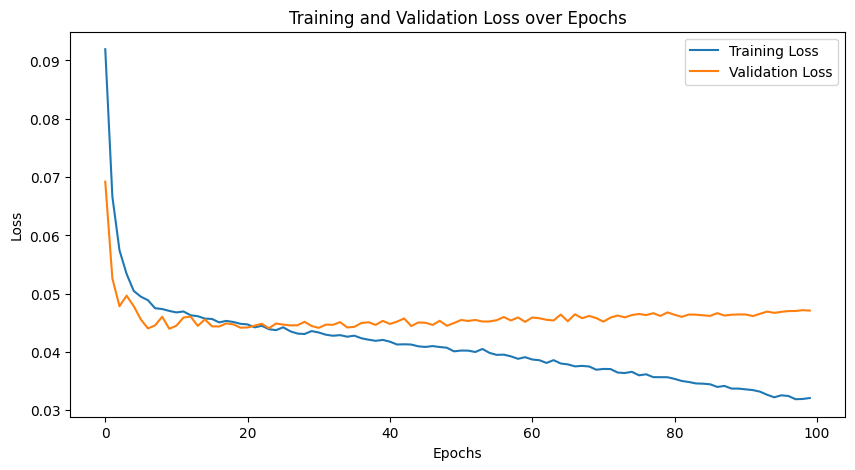

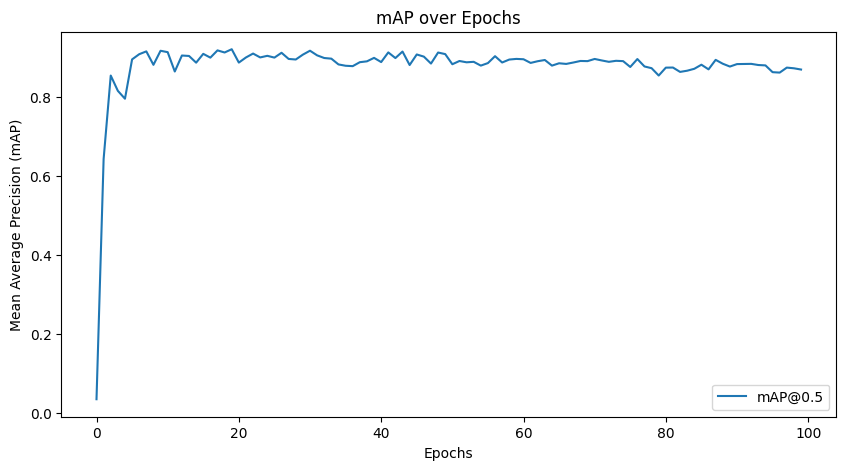

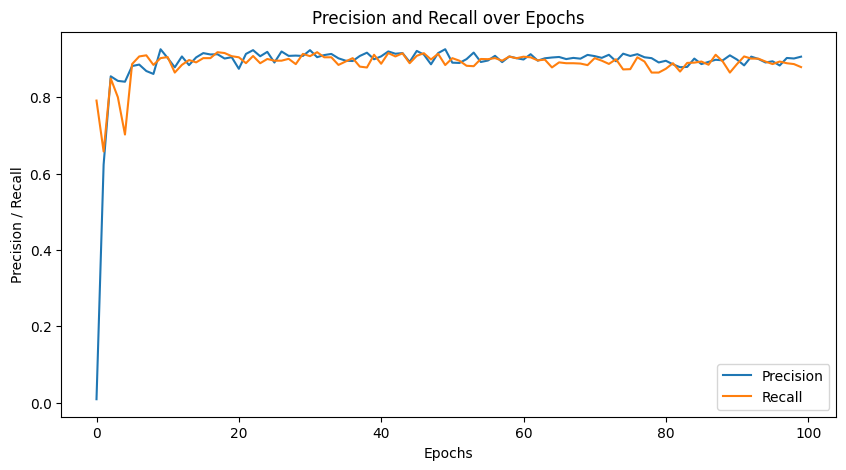

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results.csv file
df = pd.read_csv('/content/drive/MyDrive/Bee-Project/yolov5_results/exp2/results.csv')

# Strip any extra whitespace in the column names
df.columns = df.columns.str.strip()

# Extract metrics
epochs = df['epoch'].values
train_loss = df['train/box_loss'].values
val_loss = df['val/box_loss'].values
mAP = df['metrics/mAP_0.5'].values
precision = df['metrics/precision'].values
recall = df['metrics/recall'].values

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()

# Plot mAP over Epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP, label="mAP@0.5")
plt.xlabel("Epochs")
plt.ylabel("Mean Average Precision (mAP)")
plt.title("mAP over Epochs")
plt.legend()
plt.show()

# Plot Precision and Recall
plt.figure(figsize=(10, 5))
plt.plot(epochs, precision, label="Precision")
plt.plot(epochs, recall, label="Recall")
plt.xlabel("Epochs")
plt.ylabel("Precision / Recall")
plt.title("Precision and Recall over Epochs")
plt.legend()
plt.show()


Save Model

In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/Bee-Project/yolov5_results/exp2/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>